In [1]:
#Import packages
import os
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#Import cleaned up data into a dataframe
dataset = pd.read_csv("C:/Users/zainj/Analytics/Data/Data_Mining_Project/DataMiningGroupProject-master/DataMiningGroupProject-master_ZJ_20190514/hospitalData.csv",\
           index_col = "Provider ID")

In [3]:
dataset.head()

,Unnamed: 0,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,...,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Hospital Name,Address,City,State,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent
Provider ID,,,,,,,,,,,,,,,,,,,,,
010001,0,3.0,14.5,4.5,8.9,12.5,16.2,13.7,0.65,6.02,...,83.0,86.0,84.0,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,506.0,21.0
010005,1,3.0,15.5,NaN,10.9,15.3,20.8,15.7,1.10,12.17,...,88.0,85.0,88.0,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957.0,1135.0,34.0
010006,2,3.6,14.9,3.2,8.8,13.2,17.2,17.2,1.28,7.19,...,84.0,82.0,84.0,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631.0,579.0,22.0
010007,3,2.8,NaN,NaN,8.3,13.3,21.6,15.9,1.30,9.46,...,85.0,86.0,85.0,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467.0,185.0,27.0
010008,4,NaN,NaN,NaN,8.0,12.9,15.7,NaN,NaN,NaN,...,NaN,NaN,NaN,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049.0,63.0,31.0


In [4]:
#Drop the original column
dataset = dataset.drop(["Unnamed: 0"], axis = 1)

In [5]:
#Look at the data types
dataset.dtypes

COMP_HIP_KNEE                   float64
MORT_30_AMI                     float64
MORT_30_CABG                    float64
MORT_30_COPD                    float64
MORT_30_HF                      float64
MORT_30_PN                      float64
MORT_30_STK                     float64
PSI_10_POST_KIDNEY              float64
PSI_11_POST_RESP                float64
PSI_12_POSTOP_PULMEMB_DVT       float64
PSI_13_POST_SEPSIS              float64
PSI_14_POSTOP_DEHIS             float64
PSI_15_ACC_LAC                  float64
PSI_3_ULCER                     float64
PSI_4_SURG_COMP                 float64
PSI_6_IAT_PTX                   float64
PSI_8_POST_HIP                  float64
PSI_90_SAFETY                   float64
PSI_9_POST_HEM                  float64
H_CLEAN_LINEAR_SCORE            float64
H_COMP_1_LINEAR_SCORE           float64
H_COMP_2_LINEAR_SCORE           float64
H_COMP_3_LINEAR_SCORE           float64
H_COMP_5_LINEAR_SCORE           float64
H_COMP_6_LINEAR_SCORE           float64


In [6]:
#look at how many records have null values
pd.isnull(dataset).sum()

COMP_HIP_KNEE                   2213
MORT_30_AMI                     2533
MORT_30_CABG                    3930
MORT_30_COPD                    1393
MORT_30_HF                      1287
MORT_30_PN                       768
MORT_30_STK                     2373
PSI_10_POST_KIDNEY              2203
PSI_11_POST_RESP                2226
PSI_12_POSTOP_PULMEMB_DVT       1974
PSI_13_POST_SEPSIS              2219
PSI_14_POSTOP_DEHIS             2197
PSI_15_ACC_LAC                  2009
PSI_3_ULCER                     1779
PSI_4_SURG_COMP                 3238
PSI_6_IAT_PTX                   1758
PSI_8_POST_HIP                  1760
PSI_90_SAFETY                   1730
PSI_9_POST_HEM                  1978
H_CLEAN_LINEAR_SCORE            1415
H_COMP_1_LINEAR_SCORE           1415
H_COMP_2_LINEAR_SCORE           1415
H_COMP_3_LINEAR_SCORE           1415
H_COMP_5_LINEAR_SCORE           1415
H_COMP_6_LINEAR_SCORE           1415
H_COMP_7_LINEAR_SCORE           1415
H_HSP_RATING_LINEAR_SCORE       1415
H

In [7]:
#Fill the null values with the mean for now
dataset = dataset.fillna(dataset.mean())
dataset.head()

,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,...,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Hospital Name,Address,City,State,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent
Provider ID,,,,,,,,,,,,,,,,,,,,,
010001,3.000000,14.500000,4.500000,8.9,12.5,16.2,13.700000,0.650000,6.020000,5.570000,...,83.000000,86.000000,84.000000,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,506.0,21.0
010005,3.000000,15.500000,3.230178,10.9,15.3,20.8,15.700000,1.100000,12.170000,3.170000,...,88.000000,85.000000,88.000000,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957.0,1135.0,34.0
010006,3.600000,14.900000,3.200000,8.8,13.2,17.2,17.200000,1.280000,7.190000,3.310000,...,84.000000,82.000000,84.000000,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631.0,579.0,22.0
010007,2.800000,13.179386,3.230178,8.3,13.3,21.6,15.900000,1.300000,9.460000,4.760000,...,85.000000,86.000000,85.000000,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467.0,185.0,27.0
010008,2.596741,13.179386,3.230178,8.0,12.9,15.7,14.289226,1.307723,8.037586,3.811502,...,88.447152,82.239445,88.086427,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049.0,63.0,31.0


In [10]:
#Modify the dataset to all relevant numerical columns
x = dataset
x = x.drop(["Hospital Name", "Address", "City", "State"], axis = 1)
x.head()

,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,...,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent
Provider ID,,,,,,,,,,,,,,,,,,,,,
010001,3.000000,14.500000,4.500000,8.9,12.5,16.2,13.700000,0.650000,6.020000,5.570000,...,75.000000,70.00000,85.000000,79.000000,83.000000,86.000000,84.000000,36301.0,506.0,21.0
010005,3.000000,15.500000,3.230178,10.9,15.3,20.8,15.700000,1.100000,12.170000,3.170000,...,85.000000,81.00000,88.000000,81.000000,88.000000,85.000000,88.000000,35957.0,1135.0,34.0
010006,3.600000,14.900000,3.200000,8.8,13.2,17.2,17.200000,1.280000,7.190000,3.310000,...,83.000000,76.00000,83.000000,80.000000,84.000000,82.000000,84.000000,35631.0,579.0,22.0
010007,2.800000,13.179386,3.230178,8.3,13.3,21.6,15.900000,1.300000,9.460000,4.760000,...,84.000000,79.00000,85.000000,80.000000,85.000000,86.000000,85.000000,36467.0,185.0,27.0
010008,2.596741,13.179386,3.230178,8.0,12.9,15.7,14.289226,1.307723,8.037586,3.811502,...,85.736753,79.20119,87.199207,81.911873,88.447152,82.239445,88.086427,36049.0,63.0,31.0


## t-SNE with all numerical features

### t-SNE with Learning Rate of 50

In [11]:
#Perform t-SNE reduction

#Import t-SNE
from sklearn.manifold import TSNE

#Create a t-SNE instance
model = TSNE(learning_rate=50)

#Apply fit transform to x 
tsne_features = model.fit_transform(x)

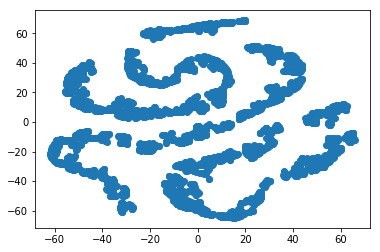

In [12]:
import matplotlib.pyplot as plt

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys)
plt.show()

### t-SNE with Learning Rate of 100

In [13]:
#Perform t-SNE reduction

#Import t-SNE
from sklearn.manifold import TSNE

#Create a t-SNE instance
model = TSNE(learning_rate=100)

#Apply fit transform to x 
tsne_features = model.fit_transform(x)

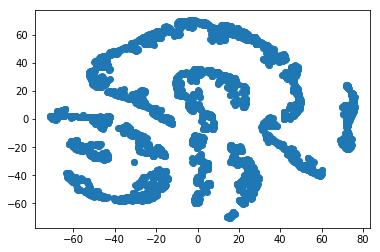

In [14]:
import matplotlib.pyplot as plt

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys)
plt.show()

### t-SNE with Learning Rate of 150

In [15]:
#Perform t-SNE reduction

#Import t-SNE
from sklearn.manifold import TSNE

#Create a t-SNE instance
model = TSNE(learning_rate=150)

#Apply fit transform to x 
tsne_features = model.fit_transform(x)

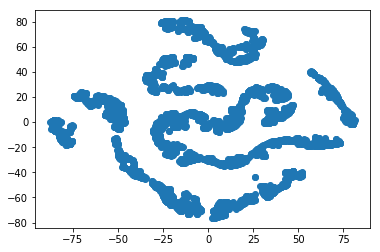

In [16]:
import matplotlib.pyplot as plt

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys)
plt.show()

### t-SNE with Learning Rate of 200

In [17]:
#Perform t-SNE reduction

#Import t-SNE
from sklearn.manifold import TSNE

#Create a t-SNE instance
model = TSNE(learning_rate=200)

#Apply fit transform to x 
tsne_features = model.fit_transform(x)

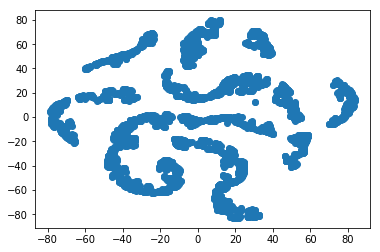

In [18]:
import matplotlib.pyplot as plt

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys)
plt.show()

## t-SNE excluding our target 'y' feature (PSI_4_SURG_COMP)

#### Only going to run one version of t-SNE going forward (learning_rate = 150)

In [19]:
#Modify the dataset to only include our "x variables"
x = dataset
x = x.drop(["Hospital Name", "Address", "City", "State", "PSI_4_SURG_COMP"], axis = 1)
x.head()

,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,...,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent
Provider ID,,,,,,,,,,,,,,,,,,,,,
010001,3.000000,14.500000,4.500000,8.9,12.5,16.2,13.700000,0.650000,6.020000,5.570000,...,75.000000,70.00000,85.000000,79.000000,83.000000,86.000000,84.000000,36301.0,506.0,21.0
010005,3.000000,15.500000,3.230178,10.9,15.3,20.8,15.700000,1.100000,12.170000,3.170000,...,85.000000,81.00000,88.000000,81.000000,88.000000,85.000000,88.000000,35957.0,1135.0,34.0
010006,3.600000,14.900000,3.200000,8.8,13.2,17.2,17.200000,1.280000,7.190000,3.310000,...,83.000000,76.00000,83.000000,80.000000,84.000000,82.000000,84.000000,35631.0,579.0,22.0
010007,2.800000,13.179386,3.230178,8.3,13.3,21.6,15.900000,1.300000,9.460000,4.760000,...,84.000000,79.00000,85.000000,80.000000,85.000000,86.000000,85.000000,36467.0,185.0,27.0
010008,2.596741,13.179386,3.230178,8.0,12.9,15.7,14.289226,1.307723,8.037586,3.811502,...,85.736753,79.20119,87.199207,81.911873,88.447152,82.239445,88.086427,36049.0,63.0,31.0


In [20]:
#Perform t-SNE reduction

#Import t-SNE
from sklearn.manifold import TSNE

#Create a t-SNE instance
model = TSNE(learning_rate=150)

#Apply fit transform to x 
tsne_features = model.fit_transform(x)

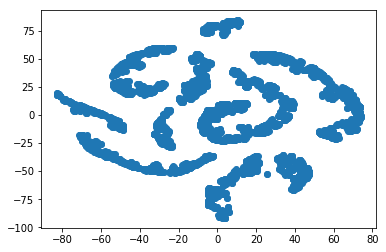

In [21]:
import matplotlib.pyplot as plt

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys)
plt.show()

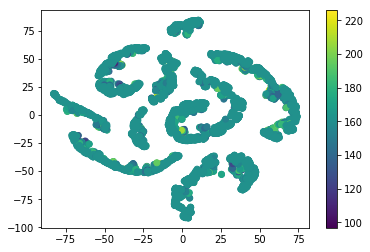

In [22]:
#Color plot based on our target 'Y'
fig, ax = plt.subplots()
im = ax.scatter(xs, ys, c=dataset.loc[:,"PSI_4_SURG_COMP"])
fig.colorbar(im, ax=ax)

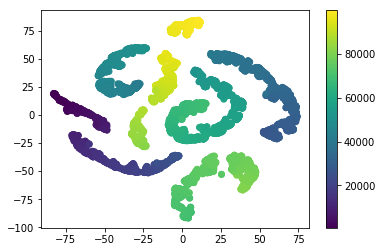

In [23]:
#Color plot based on Zip Code to see if there is a geographic impact
fig, ax = plt.subplots()
im = ax.scatter(xs, ys, c=dataset.loc[:,"ZIP Code"])
fig.colorbar(im, ax=ax)

<b>Note</b>: There seems to be some level fo clustering by geographic area, which may indicate we need to separate our data based upon this. Follow-up check, run t-SNE without Zip Code and see if we get a similar result. Zip codes typically go from lower numbers in the northeast to larger numbers in the south and west (i.e., newer population centers).

### t-SNE wtihout Zip Code to check impact of geography

In [24]:
#Modify the dataset to only include our "x variables"
x = dataset
x = x.drop(["Hospital Name", "Address", "City", "State", "ZIP Code"], axis = 1)
x.head()

,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,...,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Number of Completed Surveys,Survey Response Rate Percent
Provider ID,,,,,,,,,,,,,,,,,,,,,
010001,3.000000,14.500000,4.500000,8.9,12.5,16.2,13.700000,0.650000,6.020000,5.570000,...,90.000000,75.000000,70.00000,85.000000,79.000000,83.000000,86.000000,84.000000,506.0,21.0
010005,3.000000,15.500000,3.230178,10.9,15.3,20.8,15.700000,1.100000,12.170000,3.170000,...,94.000000,85.000000,81.00000,88.000000,81.000000,88.000000,85.000000,88.000000,1135.0,34.0
010006,3.600000,14.900000,3.200000,8.8,13.2,17.2,17.200000,1.280000,7.190000,3.310000,...,91.000000,83.000000,76.00000,83.000000,80.000000,84.000000,82.000000,84.000000,579.0,22.0
010007,2.800000,13.179386,3.230178,8.3,13.3,21.6,15.900000,1.300000,9.460000,4.760000,...,94.000000,84.000000,79.00000,85.000000,80.000000,85.000000,86.000000,85.000000,185.0,27.0
010008,2.596741,13.179386,3.230178,8.0,12.9,15.7,14.289226,1.307723,8.037586,3.811502,...,91.430434,85.736753,79.20119,87.199207,81.911873,88.447152,82.239445,88.086427,63.0,31.0


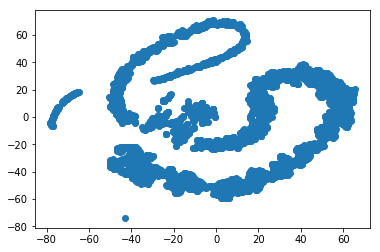

In [25]:
#Perform t-SNE reduction

#Import t-SNE
from sklearn.manifold import TSNE

#Create a t-SNE instance
model = TSNE(learning_rate=100)

#Apply fit transform to x 
tsne_features = model.fit_transform(x)

import matplotlib.pyplot as plt

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs, ys)
plt.show()

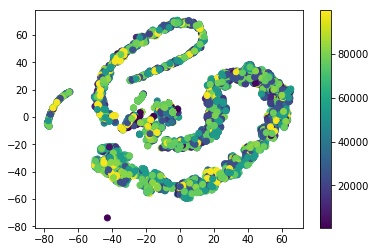

In [26]:
#Color plot based on our target 'Y'
fig, ax = plt.subplots()
im = ax.scatter(xs, ys, c=dataset.loc[:,"ZIP Code"])
fig.colorbar(im, ax=ax)

<b>Note:</b> This completely changed the shape of the reduction, which leads me to believe we need to evaluate whether we include zip code as a predictor or not. As discussed in our group meeting, as a next step I am going to scale our features as we had a hypothesis that the scale of our zip codes is impacting our result.

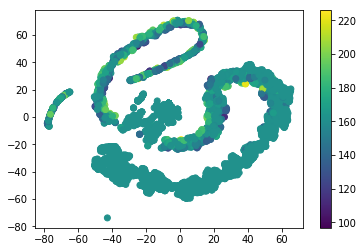

In [27]:
#Color plot based on our target 'Y'
fig, ax = plt.subplots()
im = ax.scatter(xs, ys, c=dataset.loc[:,"PSI_4_SURG_COMP"])
fig.colorbar(im, ax=ax)

### t-SNE with Standardized Features

In [34]:
#Modify the dataset to only include our "x variables"
x = dataset
x = x.drop(["Hospital Name", "Address", "City", "State"], axis = 1)
x.head()

,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,...,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent
Provider ID,,,,,,,,,,,,,,,,,,,,,
010001,3.000000,14.500000,4.500000,8.9,12.5,16.2,13.700000,0.650000,6.020000,5.570000,...,75.000000,70.00000,85.000000,79.000000,83.000000,86.000000,84.000000,36301.0,506.0,21.0
010005,3.000000,15.500000,3.230178,10.9,15.3,20.8,15.700000,1.100000,12.170000,3.170000,...,85.000000,81.00000,88.000000,81.000000,88.000000,85.000000,88.000000,35957.0,1135.0,34.0
010006,3.600000,14.900000,3.200000,8.8,13.2,17.2,17.200000,1.280000,7.190000,3.310000,...,83.000000,76.00000,83.000000,80.000000,84.000000,82.000000,84.000000,35631.0,579.0,22.0
010007,2.800000,13.179386,3.230178,8.3,13.3,21.6,15.900000,1.300000,9.460000,4.760000,...,84.000000,79.00000,85.000000,80.000000,85.000000,86.000000,85.000000,36467.0,185.0,27.0
010008,2.596741,13.179386,3.230178,8.0,12.9,15.7,14.289226,1.307723,8.037586,3.811502,...,85.736753,79.20119,87.199207,81.911873,88.447152,82.239445,88.086427,36049.0,63.0,31.0


In [37]:
#standardize features to weight them equally
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
x = scaler.fit_transform(x)

In [40]:
#Perform t-SNE reduction

#Import t-SNE
from sklearn.manifold import TSNE

#Create a t-SNE instance
model = TSNE(learning_rate=150)

#Apply fit transform to x 
tsne_features = model.fit_transform(x)

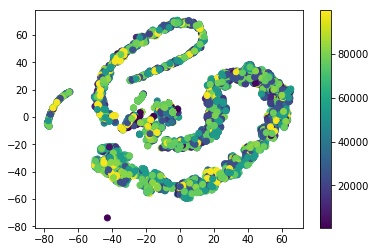

In [41]:
#Color plot based on our target 'Y'
fig, ax = plt.subplots()
im = ax.scatter(xs, ys, c=dataset.loc[:,"ZIP Code"])
fig.colorbar(im, ax=ax)

<b>Note:</b> The above result likely confirms our hypothesis that we saw a big impact due to Zip Code due to the scale of the feature vs. any inherent trends.

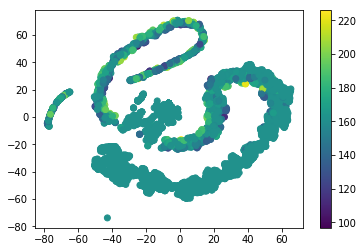

In [42]:
#Color plot based on our target 'Y'
fig, ax = plt.subplots()
im = ax.scatter(xs, ys, c=dataset.loc[:,"PSI_4_SURG_COMP"])
fig.colorbar(im, ax=ax)

<b>Observations:</b> I'm not 100% sure on how to interpret this, but it is worth noting that the right most (wider) part of the "tail" seems to largely contain middle of the range hospitals in terms of our 'Y' variable (PSI 4 SURG COMP) (in the aquamarine color). Whereas, when you go to the left most (narrower) part of our tail, there is greater variability. It may also be worth noting that the yellows/darker blues (higher/lower ends of our range) are on the edges of the "tail".

<b>Question(s):</b> Is there any "separation" or clustering that can be noted between the wider part of the "tail" vs. the narrower part? Would it be worth asking Utku for help on interpreting these charts?